# 타이타닉 (생존자 예측)
데이터 - Kaggle 사이트에서 titanic 검색
--

- 훈련 데이터https://bit.ly/2WflH16
- 테스트 데이터  https://bit.ly/2ZS7hGc


## 속성 데이터

- Survival - 생존여부: 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
!curl -L https://bit.ly/2WflH16 -o titanic_train.csv
!curl -L https://bit.ly/2ZS7hGc -o titanic_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   146  100   146    0     0    362      0 --:--:-- --:--:-- --:--:--   362

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
 78 61194   78 47993    0     0  13943      0  0:00:04  0:00:03  0:00:01 50254
100 61194  100 61194    0     0  17464      0  0:00:03  0:00:03 --:--:-- 60230
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload 

In [2]:
import pandas as pd

train = pd.read_csv("./titanic_train.csv", index_col=["PassengerId"])

In [3]:
print(train.shape)

(891, 11)


In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test = pd.read_csv("./titanic_test.csv", index_col=["PassengerId"])

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- 'Survived' 항목이 빠져 있는 것을 확인할 수 있다

In [7]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

## 비정형 데이터 --> 정형 데이터로 변환

- 성별을 Category 변수로 표현하는 column을 추가한다
    - 남성 : 0, 여성 : 1
- type(train) : DataFrame
- loc : 행(인덱스)의 위치

In [8]:
type(train)

pandas.core.frame.DataFrame

In [9]:
# 성별을 구분하는 컬럼을 추가해본다

train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [10]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1
        
print(test.shape)
test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


#### DataFrame의 자료 정보를 개괄적으로 보여주는 주요 함수
- .info() : 자료 값에 대한 정보 (data type, index 범위, column 수, 각 column별 값의 non-null 수와 type
- .describe() : 자료의 주요 대표적인 통계 값 

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null object
Fare          891 non-null float64
Cabin         204 non-null object
Embarked      889 non-null object
Sex_encode    891 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           332 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Ticket        418 non-null object
Fare          417 non-null float64
Cabin         91 non-null object
Embarked      418 non-null object
Sex_encode    418 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 39.2+ KB


## 요금이 비어 있는 항목을 찾아본다
- #### 결측치 처리 : 비어 있는 요금 항목을, 요금의 평균치로 대체 

In [14]:
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [15]:
# 비어 있는 요금 항목을, 요금의 평균치로 대체한다

mean_fare = train["Fare"].mean()
print("Fare(Mean) = ${0:.3f}".format(mean_fare))

Fare(Mean) = $32.204


In [16]:
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare

test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


### Encode Embarked 
- #### 항구 이름 : Category 변수 
    - get_dummies() : one-hot encoding 

In [15]:
train.shape

(891, 12)

In [17]:
train_embarked = pd.get_dummies(train["Embarked"], prefix="Embarked")

print(train_embarked.shape)
train_embarked.head()

(891, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [18]:
test_embarked = pd.get_dummies(test["Embarked"], prefix="Embarked")

print(test_embarked.shape)
test_embarked.head()

(418, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,0,1,0
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


In [19]:
train = pd.concat([train, train_embarked], axis=1)

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(891, 15)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,S,0,0,1
2,C,1,0,0
3,S,0,0,1
4,S,0,0,1
5,S,0,0,1


In [20]:
test = pd.concat([test, test_embarked], axis=1)

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(418, 14)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
892,Q,0,1,0
893,S,0,0,1
894,Q,0,1,0
895,S,0,0,1
896,S,0,0,1


## Train(훈련)

### Train(훈련) 데이터 구성
- X_train : 입력용 특성 data
- y_train : 레이블(정답) data

In [21]:
feature_names = ["Pclass", "Sex_encode", "Fare",
                 "Embarked_C", "Embarked_Q", "Embarked_S"]

X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
1,3,0.0,7.2500,0,0,1
2,1,1.0,71.2833,1,0,0
3,3,1.0,7.9250,0,0,1
4,1,1.0,53.1000,0,0,1
5,3,0.0,8.0500,0,0,1


In [22]:
label_name = "Survived"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### 결정 트리 모델 생성
- 그래프를 눈에 보이기 쉽게 그리기 위해, max_depth=2 로 제한
- 이후에 다시 보다 정확한 상세 모델 생성을 위해, max_depth=5 로 확대

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

graphviz.Source() 실행을 위한 환경변수(PATH) 추가
--
- import os
- os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

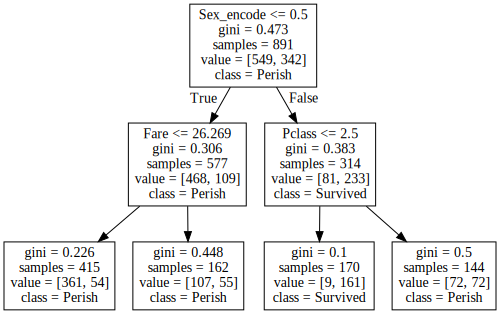

In [25]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

graphviz.Source(dot_graph)

### 결과 분석
- 루트 노드 : 성별 코드(기준 0.5)기준으로 구분 (작으면 남자, 크면 여자임)
    - 결국 남자의 경우, 모두 사망
- 2단계 : Pclass(객실등급, 기준 2.5), 즉 1 or 2 등급이면 살아날 확률이 큰 것으로 분류 

## Predict

#### 다시 보다 정확한 상세 모델 생성을 위해, max_depth=5 로 확대

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Test(시험) 데이터 구성
- X_test : 입력용 특성 data
- 예측 결과 : X_test["survived"]

In [27]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
892,3,0.0,7.8292,0,1,0
893,3,1.0,7.0000,0,0,1
894,2,0.0,9.6875,0,1,0
895,3,0.0,8.6625,0,0,1
896,3,1.0,12.2875,0,0,1


In [28]:
prediction = model.predict(X_test)

X_test["survived"] = prediction
X_test[:20]

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S,survived
PassengerId,,,,,,,
892,3,0.0,7.8292,0,1,0,0
893,3,1.0,7.0000,0,0,1,0
894,2,0.0,9.6875,0,1,0,0
895,3,0.0,8.6625,0,0,1,0
896,3,1.0,12.2875,0,0,1,1
897,3,0.0,9.2250,0,0,1,0
898,3,1.0,7.6292,0,1,0,1
899,2,0.0,29.0000,0,0,1,0
900,3,1.0,7.2292,1,0,0,1


## 아래는 캐클 사이트에 답안을 제출하는 과정이며 참고로 보기 바란다.
- 제출 양식을 따로 다운로드 받아야 한다.


제출 양식 https://bit.ly/2KvK3k4

## Submit

In [27]:
!curl -L https://bit.ly/2KvK3k4 -o titanic_gender_submission.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   158  100   158    0     0    174      0 --:--:-- --:--:-- --:--:--   174
100   158  100   158    0     0    174      0 --:--:-- --:--:-- --:--:--   174

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

100  3258  100  3258    0     0   1044      0  0:00:03  0:00:03 --:--:--  1044
100  3258  100  3258    0     0   1044      0  0:00:03  0:00:03 --:--:--     0


In [28]:
import numpy as np
submission = pd.read_csv("./titanic_gender_submission.csv", index_col="PassengerId")

submission["Survived"] = prediction.astype(np.int32)

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [0]:
submission.to_csv("baseline-script.csv")
from google.colab import files
files.download("baseline-script.csv")